In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy.stats import zscore
from scipy.stats import boxcox

In [115]:
df_adv=pd.read_csv("Advertising.csv",index_col=0)
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [116]:
df_adv.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [117]:
df_adv.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [118]:
df_adv.shape

(200, 4)

In [119]:
#To check the data types and null values
df_adv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [120]:
#Statistical analysis of data
df_adv.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


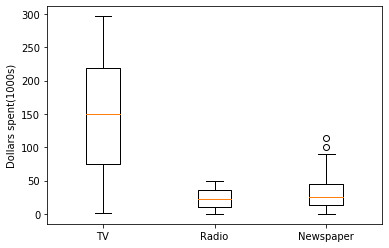

In [121]:
#Box plot is created to check the outliers in the data
fig, ax = plt.subplots()
ax.boxplot([df_adv["TV"],df_adv["radio"],df_adv['newspaper']])
ax.set_xticklabels(["TV","Radio","Newspaper"])
ax.set_ylabel("Dollars spent(1000s)")
plt.show()
#2 outliers were found in 'newspaper' colummn

In [122]:
df_adv[df_adv.newspaper>90]

,TV,radio,newspaper,sales
17,67.8,36.6,114.0,12.5
102,296.4,36.3,100.9,23.8


In [123]:
#Checking of potential outlier data
df_adv[df_adv.newspaper>75]

,TV,radio,newspaper,sales
17,67.8,36.6,114.0,12.5
76,16.9,43.7,89.4,8.7
102,296.4,36.3,100.9,23.8
119,125.7,36.9,79.2,15.9
142,193.7,35.4,75.6,19.2
166,234.5,3.4,84.8,11.9


In [124]:
#To check the correlations in data
df_adv.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


C:\Users\j\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


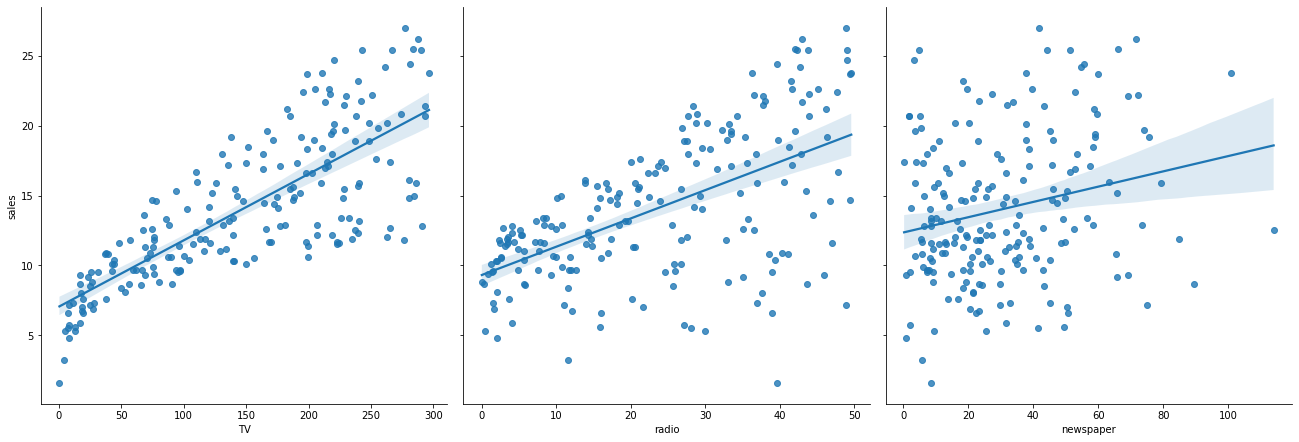

In [125]:
#To visualize the correlation between sales and other input variables
sns.pairplot(df_adv, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales',size=6, kind='reg')

#Relationship between money spent on TV advertising and sales is positive and strong
#Relationship between money spent on Radio advertising and sales is positive but not strong
#Relationship between money spent on Newspaper advertising and sales is positive but weak

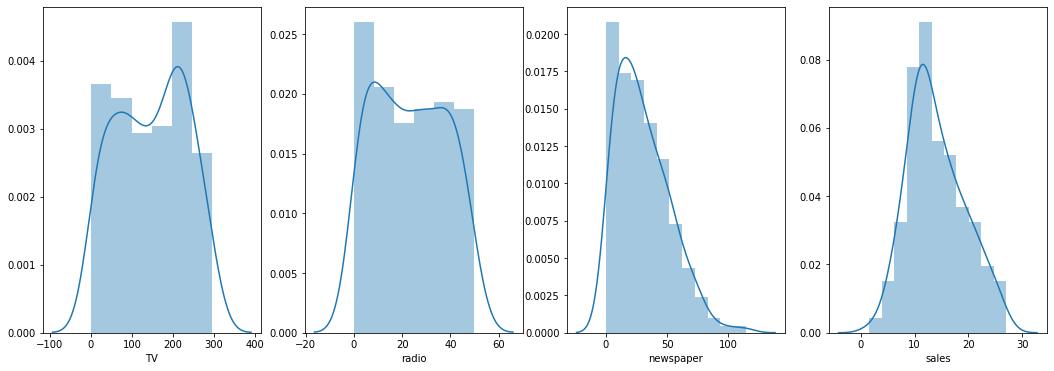

In [126]:
col_list=df_adv.columns.values
plt.figure(figsize=(18,6))
for i in range(0, len(col_list)):                                       #Distplot is used To check the skewness
    plt.subplot(1,4,i+1)
    sns.distplot(df_adv[col_list[i]])
#Although newspaper graph is slightly right skewed, but due to its weak relationship with sales, we will leave it as it is.

In [127]:
#To check and drop duplicates in date
df_adv=df_adv.drop_duplicates()
df_adv.shape

(200, 4)

In [128]:
from scipy.stats import zscore
z_score=abs(zscore(df_adv))
print(df_adv.shape)
df_adv_final=df_adv.loc[(z_score<3).all(axis=1)]                  
print(df_adv_final.shape)
#to quantify the outliers

(200, 4)
(198, 4)


In [129]:
df_adv=df_adv[(z_score<3).all(axis=1)]
#To remove the outliers

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [131]:
#Splitting of data
x=df_adv.iloc[:,:3]
y=df_adv['sales']

In [132]:
print(x.shape)
print(y.shape)

(198, 3)
(198,)


In [133]:
sc = StandardScaler()
x = sc.fit_transform(x)
#scaling down using standardscalar

In [134]:
#Testing the models at random state 42 along with their r2 score
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,test_size=0.20)
model=[LinearRegression(),DecisionTreeRegressor(),SVR(),KNeighborsRegressor()]

for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print(r2_score(y_test,predm))

#After the testing several models, we have found that DecisionTreeRegressor is giving highest r2 score at random state 42.

0.8989454779619588
0.9697582503474897
0.9214432262927645
0.9390950886882399


In [135]:
#Now we will check at what randome state, LinearRegression model will give highest r2 score.
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2 score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print('max r2 score corresponding to ',final_r_state," is ",max_r_score)
#Max. r2 score with LinearRegression model is  0.9477136584598765, which is at random state 90.

r2 score corresponding to random state:  42  is:  0.8989454779619588
r2 score corresponding to random state:  43  is:  0.8751484803695656
r2 score corresponding to random state:  44  is:  0.8117000632290441
r2 score corresponding to random state:  45  is:  0.8747422037972019
r2 score corresponding to random state:  46  is:  0.8726271917983102
r2 score corresponding to random state:  47  is:  0.8922946750347813
r2 score corresponding to random state:  48  is:  0.866237899668671
r2 score corresponding to random state:  49  is:  0.8351144932670392
r2 score corresponding to random state:  50  is:  0.842978540309269
r2 score corresponding to random state:  51  is:  0.8969749608189316
r2 score corresponding to random state:  52  is:  0.8925145995117171
r2 score corresponding to random state:  53  is:  0.8524939615808071
r2 score corresponding to random state:  54  is:  0.8776799027550092
r2 score corresponding to random state:  55  is:  0.8977109139390169
r2 score corresponding to random sta

In [136]:
#Now we will check at what random state, DTR model will give highest r2 score.
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=DecisionTreeRegressor()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2 score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print('max r2 score corresponding to ',final_r_state," is ",max_r_score)
#Max. r2 score with DTR model is  0.9754188320803875, which is at random state 74.

r2 score corresponding to random state:  42  is:  0.9657395356725448
r2 score corresponding to random state:  43  is:  0.9567213377621312
r2 score corresponding to random state:  44  is:  0.8952448129854944
r2 score corresponding to random state:  45  is:  0.9394936618744971
r2 score corresponding to random state:  46  is:  0.963966805662847
r2 score corresponding to random state:  47  is:  0.8971988136388747
r2 score corresponding to random state:  48  is:  0.9439858727565542
r2 score corresponding to random state:  49  is:  0.9524350713252904
r2 score corresponding to random state:  50  is:  0.9373481895336634
r2 score corresponding to random state:  51  is:  0.9624603165529043
r2 score corresponding to random state:  52  is:  0.9716957574437518
r2 score corresponding to random state:  53  is:  0.9368767578624393
r2 score corresponding to random state:  54  is:  0.9692363831833173
r2 score corresponding to random state:  55  is:  0.9555377667951518
r2 score corresponding to random st

In [137]:
#Now we will check at what random state, SVR model will give highest r2 score.
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=SVR()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2 score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print('max r2 score corresponding to ',final_r_state," is ",max_r_score)
#Max. r2 score with SVR model is  0.9719904194839495, which is at random state 63.

r2 score corresponding to random state:  42  is:  0.9214432262927645
r2 score corresponding to random state:  43  is:  0.9087532390066326
r2 score corresponding to random state:  44  is:  0.9402082209757017
r2 score corresponding to random state:  45  is:  0.949053440304406
r2 score corresponding to random state:  46  is:  0.8726435043343891
r2 score corresponding to random state:  47  is:  0.9355099684050123
r2 score corresponding to random state:  48  is:  0.8949224033955179
r2 score corresponding to random state:  49  is:  0.8893458511253087
r2 score corresponding to random state:  50  is:  0.9492296756903015
r2 score corresponding to random state:  51  is:  0.89967993195289
r2 score corresponding to random state:  52  is:  0.9476921095120062
r2 score corresponding to random state:  53  is:  0.8597315383835638
r2 score corresponding to random state:  54  is:  0.8883784199696447
r2 score corresponding to random state:  55  is:  0.8980847620366303
r2 score corresponding to random stat

In [138]:
#Now we will check at what random state, KNeighborsRegressor model will give highest r2 score.
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=KNeighborsRegressor()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2 score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print('max r2 score corresponding to ',final_r_state," is ",max_r_score)
#Max. r2 score with KNeighborsRegressor model is  0.9719646092463459, which is at random state 52.

r2 score corresponding to random state:  42  is:  0.9390950886882399
r2 score corresponding to random state:  43  is:  0.9357458203690323
r2 score corresponding to random state:  44  is:  0.9377704923080539
r2 score corresponding to random state:  45  is:  0.9157585531583841
r2 score corresponding to random state:  46  is:  0.8879091404973124
r2 score corresponding to random state:  47  is:  0.9414290945376803
r2 score corresponding to random state:  48  is:  0.918840165460962
r2 score corresponding to random state:  49  is:  0.9213414673936267
r2 score corresponding to random state:  50  is:  0.9616506396969227
r2 score corresponding to random state:  51  is:  0.9179500665043123
r2 score corresponding to random state:  52  is:  0.9719646092463459
r2 score corresponding to random state:  53  is:  0.8876724219139001
r2 score corresponding to random state:  54  is:  0.9205834674331995
r2 score corresponding to random state:  55  is:  0.9366445212419684
r2 score corresponding to random st

In [139]:
#Cross Validation of DTR
from sklearn.model_selection import cross_val_score
cross_val_score(DecisionTreeRegressor(),x,y,cv=5,scoring='r2').mean()

0.9564483066973164

In [141]:
#since maximum r2 score is coming around random state 66 and using DTR model, we will use that to create our model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=74,test_size=0.20)
dtr=DecisionTreeRegressor()            
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)
y_pred=dtr.predict(x_test)
print(r2_score(y_test,y_pred))

0.9731936997340966


In [198]:
#Gridsearchcv analysis to find out best parameter among selected ones in DTR model
dtr_cv = GridSearchCV(DecisionTreeRegressor(random_state=None),
              param_grid={'criterion':['mse', 'friedman_mse'],'min_samples_split':[2,4]},
              scoring='r2', cv=5, refit=True)

dtr_cv.fit(x_train, y_train)
dtr_cv.best_params_

result = dtr_cv.cv_results_
print(dtr_cv.best_estimator_)
r2_score(y_test, dtr_cv.best_estimator_.predict(x_test))
#At random_state=None,with friedman_mse criterion and min_samples_split of 2, we have DTR model with r2 score of 0.975189774338857

DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


0.9751897743388576

In [206]:
#Implementing DTR model with best parameters.
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=74,test_size=0.20)
dtr=DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')            
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)
y_pred=dtr.predict(x_test)
print(r2_score(y_test,y_pred))

0.9757002458771242


In [211]:
df_advertising_pred=pd.DataFrame(y_pred)                #To save the prediction in csv
df_advertising_pred.to_csv("Project6_Prediction.csv")